# Desafio de Data Science da Tractian (Parte 1)

**Nome:** [Mauricio Barrios Castellanos]

**E-mail:** [mauricio.bc.89@gmail.com]

**Data:** [11/05/2023]

**Descrição do Desafio:**

Utilizando estes arquivos você deve completar as seguintes etapas:

1. Apresentar os dados contidos nos arquivos no domínio do tempo.
2. Apresentar os dados contidos nos arquivos no domínio da frequência (fft).
3. Apresentar os dados contidos nos arquivos no domínio da frequência (fft).
4. [Bônus] Criar uma função capaz de identificar os harmônicos e picos no domínio da frequência, de maneira a reduzir a quantidade de dados e filtrar a informação relevante.

## Importação de Bibliotecas

- `numpy` (np): Matemática eficiente.
- `matplotlib.pyplot` (plt): Visualização de gráficos.
- `pandas` (pd): Manipulação de dados.
- `os` e `glob`: Lidam com arquivos e caminhos.
- `datetime` e `time`: Manipulação de datas e tempo.
- `scipy.fft` (fft, fftfreq): Biblioteca científica que oferece funções para calcular a transformada rápida de Fourier.
- `scipy.constants.g`:  Constante de gravidade
- `scipy.signal` (find_peaks, windows): Usada para processamento de sinais, incluindo a detecção de picos em séries temporais.

In [1]:
# import libraries
# ================================================================
import numpy as np                    # mathematics
import matplotlib.pyplot as plt       # plot
import pandas as pd                   # pandas dataframe
import os                             # files sort
import glob                           # glob
import datetime                       # process timestamp
import time                           # time                       
from scipy.fft import   fft, fftfreq  # function fo fast fourier
from scipy.constants import g         # gravity constant
from scipy.signal import find_peaks, windows  # signar processsing

## Funções

Aqui estão as funções definidas no código:

1. `dft(X, fr)`: Esta função calcula a transformada de Fourier discreta (DFT) para uma matriz de dados `X`. Ela retorna a amplitude da transformada de Fourier, descartando as primeiras cinco frequências. É usado para analisar as características de frequência dos dados de vibração.

2. `plot_vib(df, haxis, name, start, xlabel, case)`: Esta função é usada para plotar os dados de vibração no domínio do tempo ou da frequência. Ela permite personalizar vários aspectos do gráfico, como o título, rótulos dos eixos, limites e mais.

3. `RMS(x)`: Esta função calcula o valor eficaz quadrático médio (RMS) dos dados em `x`. É útil para avaliar a amplitude eficaz das vibrações.

Essas funções são essenciais para a análise de dados de vibração e serão utilizadas ao longo do código.

In [2]:
# functions
# =================================================================
def dft(X, fr):
  ''' get a fft from a matrix of data X, 
  row measurement, columns sensors
  X = amplitude matrix on time domain
  dt = sampling frequency
  '''
  n = len(X)                          # quanttity of data
  fourier = fft(X, axis=0)[0:n//2, :] # amplitude fourier transform
  Xf = 2.0/n*np.abs(fourier)          # amplitude
  Xf[:5] = 0                          # take off first values
  f = fftfreq(n, 1/fr)[0:n//2]        # frequency values
  return f, Xf
def plot_vib(df, haxis,  name = '', start = time.time(),
    xlabel ='time [s]', case='time'):
  ''' Function to plot vibration in time or frequency '''
  # get time -----------------------------------------------------
  dt_object = datetime.datetime.fromtimestamp(start)
  date_time = dt_object.strftime('%Y-%m-%d %H:%M:%S')

  # change the y limits based on case ----------------------------
  if case=='time':
    max_df = np.max(np.array(np.abs(df)))*1.05
    min_df = - max_df
  else:
    max_df = np.array(df).max()*1
    min_df = 0

  # plot ---------------------------------------------------------
  fig, axs = plt.subplots(df.shape[1], 1, sharex=True,
    figsize=(7,7))
  fig.suptitle('sensor %s, on %s'%(name, date_time))
  for ax, col in zip(axs, df.columns):
    vib = np.array(df[col])
    ax.plot(haxis, vib, color='k', )
    ax.set_ylabel('%s [$\\mathrm{m/s^2}$]'%(col))
    ax.set_xlim(haxis.min(), haxis.max())
    ax.set_ylim(min_df, max_df)
  ax.set_xlabel(xlabel)
  fig.tight_layout()
  return fig, axs
RMS = lambda x: (np.sum(x**2, axis=0)/x.shape[0])**0.5

## Importação de Dados

Nesta seção, os dados são importados a partir de arquivos CSV localizados na pasta 'data/part1'. Os dados são organizados em um dicionário chamado 'sensors', onde cada sensor tem seu próprio conjunto de informações, incluindo o horário de início da coleta de dados, o intervalo entre as amostras e os próprios dados armazenados em um DataFrame do Pandas.


- `sensors`: É um dicionário que irá conter os dados de cada sensor. Cada sensor é identificado pelo seu nome.

- Um loop é usado para percorrer todos os arquivos CSV, e as informações relevantes, como o horário de início, intervalo e nome do sensor, são extraídas do nome do arquivo.

- Os dados do sensor são lidos a partir do arquivo CSV usando a biblioteca Pandas e armazenados no dicionário 'sensors', associados ao nome do sensor.

In [3]:
# import data
# =================================================================
data_paths = glob.glob(os.sep.join(['data', 'part1', '*.csv']))
sensors = {}   # dictionary to save all data
for path in data_paths:
  file_name = path.split(os.sep)[-1] 
  start, interval, name = file_name.split('-') # get data inf
  name = name[:-4]                             # sensor name
  sensors[name] = {
    'start' : int(start),
    'interval': int(interval),
    'data': pd.read_csv(path)
  }

## Data no dominio do tempo

Nesta seção, os dados são processados e plotados no domínio do tempo para cada sensor. seguindo as seguites etapas:

- Um loop `for` é usado para percorrer todos os sensores no dicionário 'sensors'.

- É calculado o tempo máximo de amostragem em segundos (`max_time`) com base no intervalo de amostragem do sensor.

- O tempo de amostragem (`dt`) é calculado com base no tempo máximo de amostragem e o número de pontos de dados no sensor.

- Um vetor de tempo (`t`) é criado com base no tempo de amostragem e o número de pontos de dados.

- A frequência de amostragem é calculada e armazenada no dicionário 'sensors'.

- É feita a remoção do deslocamento da gravidade dos dados do sensor que ficam na pocissão vertical, seguida por uma conversão das unidades para metros por segundo ao quadrado ($m/s^2$).

- Os dados processados são então plotados no domínio do tempo usando a função `plot_vib`, que foi definida anteriormente. Os gráficos mostram as vibrações dos sensores no decorrer do tempo.

x   -1.0
y    0.0
z    0.0
dtype: float64
x    0.0
y   -0.0
z    1.0
dtype: float64
x   -1.0
y    0.0
z    0.0
dtype: float64
x   -0.0
y    0.0
z    1.0
dtype: float64


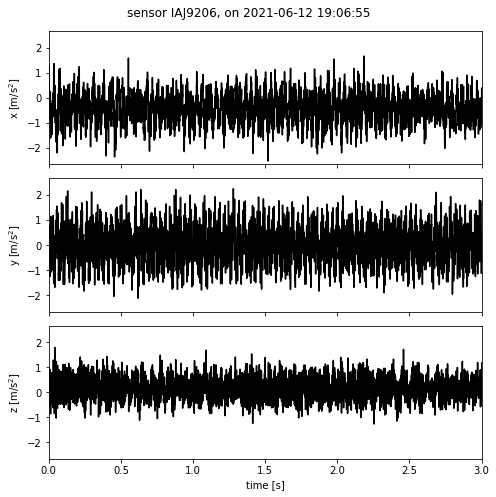

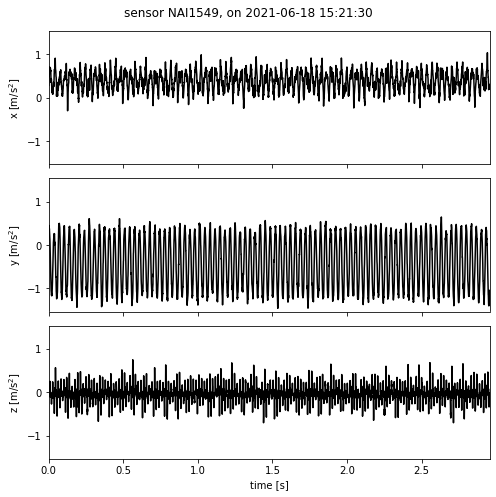

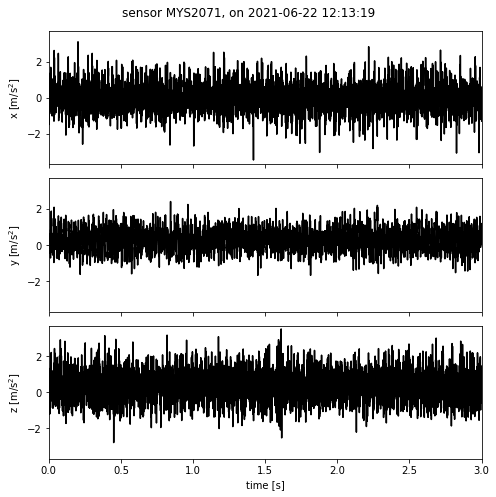

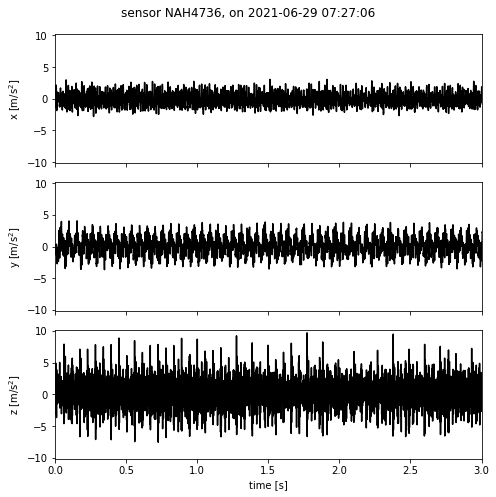

In [4]:
# data in time domain
# =================================================================
for name in sensors:
  data = sensors[name]['data']
  max_time = sensors[name]['interval']/1000 # time in seconds
  start = sensors[name]['start']            # start time

  # get the time and save frequency sampling ----------------------
  dt = max_time/data.shape[0]             # time sampling
  t = np.arange(data.shape[0])*dt         # time vector
  sensors[name]['sampling'] = 1/dt        # frequency sampling Hz

  # remove gravity offset from vertical sensor and change units ---
  print(np.round(data.mean()))
  data_rem = data - np.round(data.mean()) # remove g offset
  data_rem = data_rem*g                   # change to m/s2

  # plot ---------------------------------------------------------
  fig, axs = plot_vib(data_rem, t, name=name, start=start)

## Dados no Domínio da Frequência

Neste segmento, ocorre o processamento e a representação gráfica dos dados no domínio da frequência para cada sensor. As etapas envolvidas incluem:

- Um loop `for` é usado para percorrer todos os sensores no dicionário 'sensors'.

- A frequência de amostragem (`sampling`) é obtida do dicionário 'sensors'.

- É feita a remoção do deslocamento da gravidade dos dados do sensor, seguida por uma conversão das unidades para metros por segundo ao quadrado ($m/s^2$).

- Uma janela Hanning é aplicada aos dados de vibração para minimizar vazamento espectral.

- A Transformada Rápida de Fourier (DFT) é aplicada aos dados processados para calcular a amplitude no domínio da frequência. O resultado é armazenado em um DataFrame do Pandas chamado `data_vib`.

- As informações da frequência (`f`) e os dados no domínio da frequência (`data_vib`) são adicionados ao dicionário 'sensors'.

- A seguir, os dados no domínio da frequência são representados graficamente usando a função plot_vib, que foi definida anteriormente. Esses gráficos apresentam as vibrações detectadas pelos sensores no contexto do domínio da frequência.

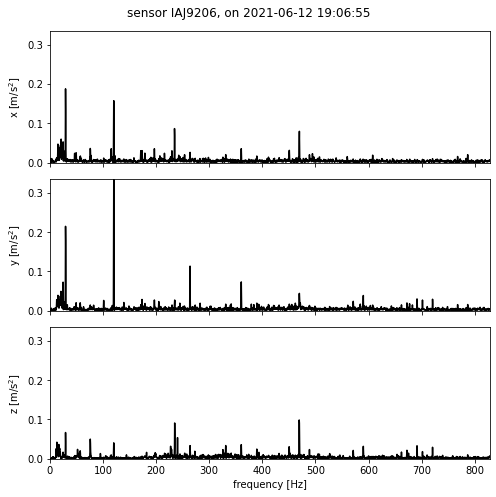

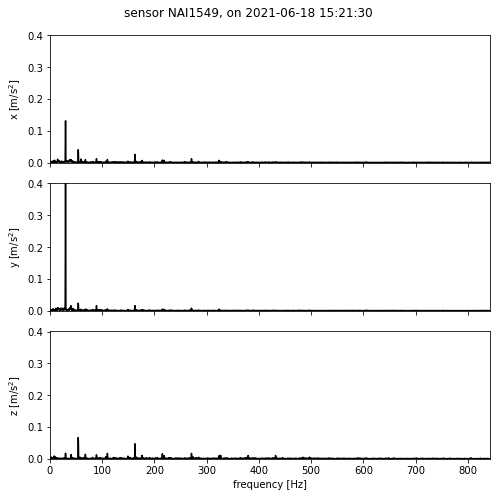

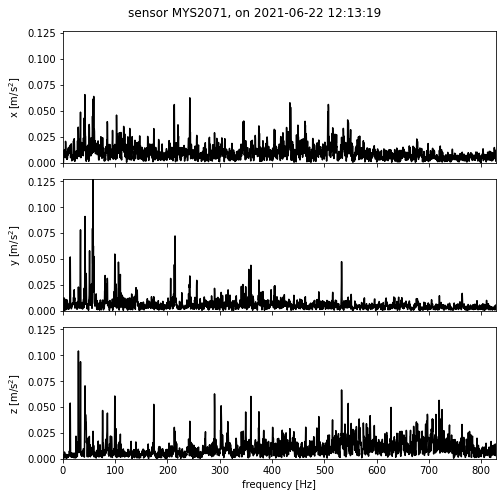

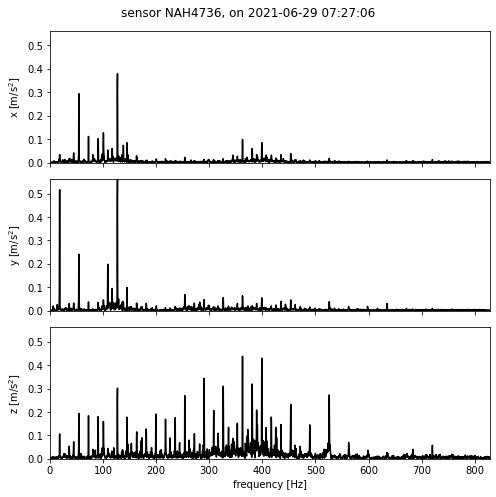

In [5]:
# data in frequency domain
# =================================================================
for name in sensors:
  data = sensors[name]['data']
  start = sensors[name]['start']
  sampling = sensors[name]['sampling']
  # remove gravity offset from vertical sensor and change units ---
  data_rem = data - np.round(data.mean()) # remove g offset
  data_rem = data_rem*g                   # change to m2/s
  # apply hanning window to the vibration data -------------------
  win = windows.hann(data.shape[0], np.pi*0.5) 
  win = win[:, np.newaxis]                # hanning window
  X = np.array(data_rem)*win              # vibration matrix
  # apply the dft ------------------------------------------------
  f, Y = dft(X, sampling)                           #
  data_vib = pd.DataFrame(Y, columns=data.columns)
  sensors[name]['f'] = f
  sensors[name]['data_freq'] = data_vib
  # plot ---------------------------------------------------------
  fig, axs = plot_vib(data_vib, f, name=name, start=start,
    xlabel='frequency [Hz]',case='freq')

## Função para Picos e Harmônicos

### Função `find_peaks_harmonics`:

A função `find_peaks_harmonics` tem como objetivo encontrar os índices dos picos no espectro de frequência que ultrapassam um limite especificado e identificar seus harmônicos correspondentes, ela e feita da seuinte maneira:

- Parâmetros:
  - `y`: O espectro de frequência a ser analisado.
  - `threshold`: O limite usado para identificar os picos.
  - `f`: O vetor de frequência correspondente ao espectro.

- Funcionamento:
  - A função começa encontrando os índices dos picos no espectro que estão acima do limite especificado. Os índices dos picos são armazenados na lista `peaks`.

  - Em seguida, a função inicializa duas listas vazias: `harmonics` (para armazenar os harmônicos) e `main_peaks` (para armazenar as frequências principais).

  - A função itera pelos picos encontrados e verifica se esses picos já estão na lista de `harmonics`. Se estiverem, são ignorados.
  
  - Se o pico não estiver na lista de `harmonics`, a função verifica se há mais de um pico no espectro que é um múltiplo inteiro do pico atual. Se houver, isso indica a presença de harmônicos.

  - A função registra os harmônicos na lista `harmonics` e a frequência principal associada a esses harmônicos na lista `main_peaks`.

- Resultado:
  - A função retorna três listas: `peaks` (índices dos picos), `harmonics` (índices dos harmônicos) e `main_peaks` (índices das frequências principais).

In [6]:
def find_peaks_harmonics(y, threshold, f):
  ''''
  Function to find the indices of peaks in the frequency vector
  above the specified threshold and their corresponding harmonics,\
     if any.

  Parameters:
    y: The frequency spectrum to be analyzed.
    threshold: The threshold used to identify peaks.
    f: The frequency vector corresponding to the spectrum.

  Returns:
    peaks: List of indices of peaks.
    harmonics: List of indices of harmonics.
    main_peaks: List of indices of main frequencies.
  '''
   # Find peaks in the spectrum above the threshold
  peaks = find_peaks(y, threshold)[0]   

  # Initialize lists to store harmonics and main frequencies
  harmonics = np.array([], dtype=int)   # store the harmonics
  main_peaks = np.array([], dtype=int)  # store mean frequencies 
  
  # Iterate through peaks to identify harmonics
  # after the middle of spectrum there is no possible harmonics
  peaks_eval = peaks[peaks<(len(f)//2 + 1)] 
  for peak in peaks_eval:
    if np.isin(peak, harmonics): 
      continue # Ignore frequencies that are already in harmonics 
    elif sum(peaks%peak==0)>1:
      # Check if there is more than one peak in the spectrum 
      #   that is a multiple of the current peak
      harm = peaks[peaks%peak==0]
      print('main freq = %.2f  [Hz] presents %s harmonics'%(
        f[peak], len(harm)
      ))
      harmonics = np.r_[harmonics, harm] # Store harmonics in the list
      main_peaks = np.r_[main_peaks, peak] # Store the main frequency
  return peaks, harmonics, main_peaks

### Teste da função:

Na sequência a função é testada seguindo o seguinte roteiro: 

- Um loop `for` é usado para percorrer todos os sensores no dicionário 'sensors'.

- Os dados no domínio da frequência (`data_vib`) e informações relevantes, como a frequência (`f`), são acessados para o sensor atual.

- Os gráficos dos espectros de frequência são novamente plotados usando a função `plot_vib`, exibindo as amplitudes das frequências em função da frequência.

- Os valores eficazes quadráticos médios (RMS) das amplitudes são calculados.

- Para cada gráfico, um limite (threshold) é definido com base no valor RMS.

- A função `find_peaks_harmonics` é chamada para encontrar os picos, harmônicos e frequências principais no espectro que estão acima do limite.

- O número de frequências principais com harmônicos acima do valor RMS é exibido na saída.

- Linhas horizontais azuis representam o valor RMS no gráfico, e linhas verticais cinza destacam a posição dos picos. Se houver harmônicos, eles são marcados com "x" vermelhos no gráfico.

main freq = 2.00  [Hz] presents 13 harmonics
main freq = 12.64  [Hz] presents 6 harmonics
main freq = 14.97  [Hz] presents 2 harmonics
main freq = 18.63  [Hz] presents 2 harmonics
main freq = 19.63  [Hz] presents 3 harmonics
main freq = 20.96  [Hz] presents 2 harmonics
main freq = 23.29  [Hz] presents 4 harmonics
main freq = 24.62  [Hz] presents 3 harmonics
main freq = 25.62  [Hz] presents 2 harmonics
main freq = 26.28  [Hz] presents 2 harmonics
main freq = 29.27  [Hz] presents 2 harmonics
main freq = 114.11  [Hz] presents 2 harmonics
main freq = 117.43  [Hz] presents 2 harmonics
main freq = 120.09  [Hz] presents 2 harmonics
main freq = 122.42  [Hz] presents 2 harmonics
main freq = 129.08  [Hz] presents 2 harmonics
main freq = 248.50  [Hz] presents 2 harmonics
sensor IAJ9206 in direction x presents 17 main frequencies       with harmonics over rms value
main freq = 12.64  [Hz] presents 8 harmonics
main freq = 14.64  [Hz] presents 3 harmonics
main freq = 17.96  [Hz] presents 3 harmonics

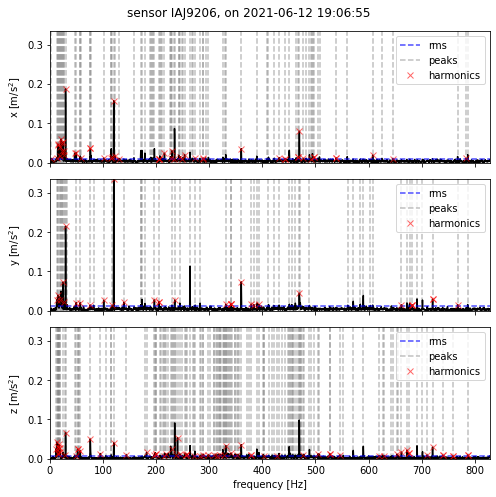

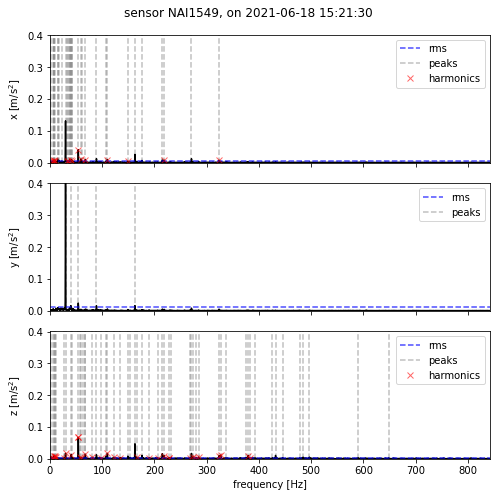

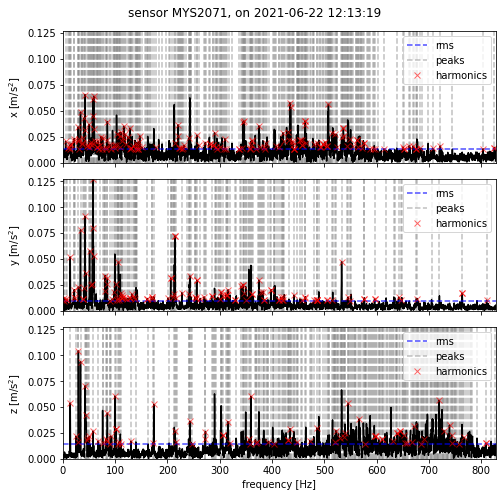

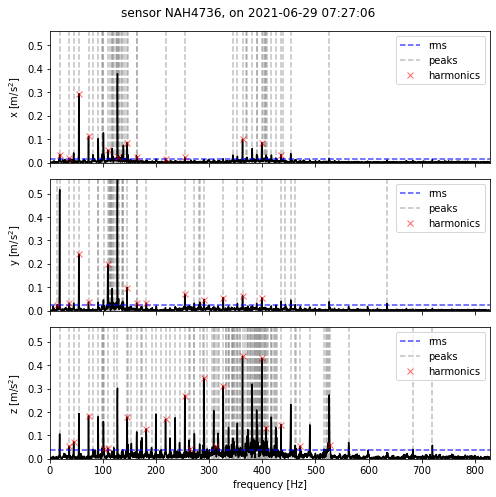

In [7]:
# find harmonics
# =================================================================
for name in sensors:
  data = sensors[name]['data']
  start = sensors[name]['start']
  f = sensors[name]['f']
  data_vib = sensors[name]['data_freq']
  # plot ---------------------------------------------------------
  fig, axs = plot_vib(data_vib, f, name=name, start=start,
    xlabel='frequency [Hz]',case='freq')
  Y = np.array(data_vib)
  # finding peaks in spectrum ------------------------------------
  rms = RMS(Y)
  for i, ax in enumerate(axs):
    threshold = rms[i]
    ax.hlines(threshold, f.min(), f.max(), color='b', label='rms',
    linestyle='--', alpha=0.7)
    peaks, harmonics, main_peaks = find_peaks_harmonics(
      Y[:, i], threshold, f)
    print('sensor %s in direction %s presents %s main frequencies\
       with harmonics over rms value'%(
      name, data_vib.columns[i], len(main_peaks)
    ))
    ax.vlines(f[peaks], 0, Y.max()*1.05, color='gray', zorder=0, 
      label='peaks', linestyle='--', alpha=0.5)
    if len(harmonics)>0:
      ax.plot(f[harmonics], Y[harmonics, i], 'x', color='r', 
        label='harmonics', alpha=0.6)
    ax.legend()